<a href="https://colab.research.google.com/github/pepe54aguilar/EDEM_MDA2324/blob/CHUCK/Alumnos/FS/Pepe_Aguilar_van_der_Hofstadt/Chuck/Chuck_Norris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis chistes de Chuck Norris**

El objetivo es contar las veces que aparece cada sustantivo en chistes aleatorios de Chuck Norris

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
with open('results.txt', 'r') as file:
    data = file.read().split(';')[:-1]

palabras, numeros = zip(*(elemento.split(',') for elemento in data))

numeros = list(map(int, numeros))

En el archivo Python se escribe en results.txt el sustantivo y el número de veces que ha salido en algun chiste en este formato:

> sustantivo,n_veces;...




Para la visualización realizaremos el conteo sobre 1000 chistes de Chuck Norris

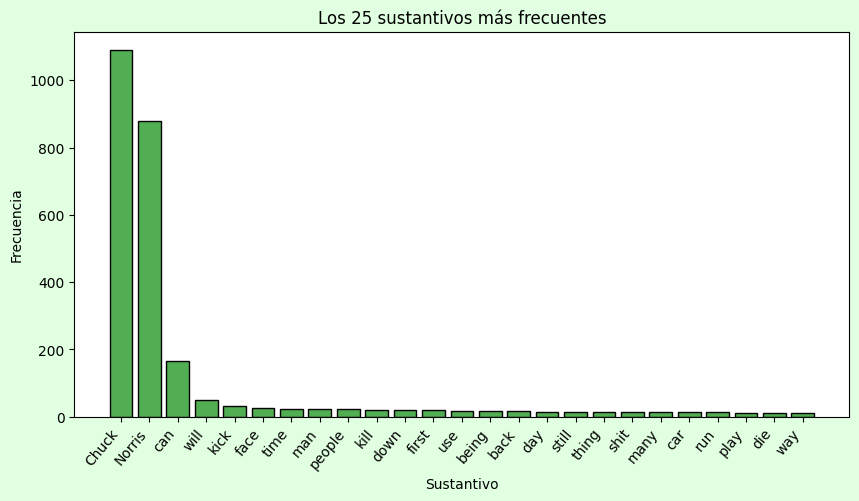

In [40]:
df = pd.DataFrame({'Palabra': palabras, 'Numero': numeros})

palabras_frecuentes = df.groupby('Palabra').sum().sort_values(by='Numero', ascending=False).head(25)

plt.figure(figsize=(10, 5), facecolor='#E1FFE1')

plt.bar(palabras_frecuentes.index, palabras_frecuentes['Numero'], color = '#52AE52', edgecolor='#000000')
plt.xlabel('Sustantivo')
plt.ylabel('Frecuencia')
plt.title('Los 25 sustantivos más frecuentes')
plt.xticks(rotation=50, ha='right')
plt.show()

Como podiamos intuir, Chuck y Norris son las palabras más frecuentes.

Hay palabras como 'can' o 'will' (las siguientes más frecuentes) que muy probablemente deban atribuir su frecuencia no al sustantivo, por ejemplo, can, en inglés como sustantivo es lata, pero tambien es el verbo poder, verbo que muy probablemente se utilice mucho en los chistes de Chuck Norris.

Vamos a hecharle un vistazo al gráfico quitando las palabras Chuck y Norris.

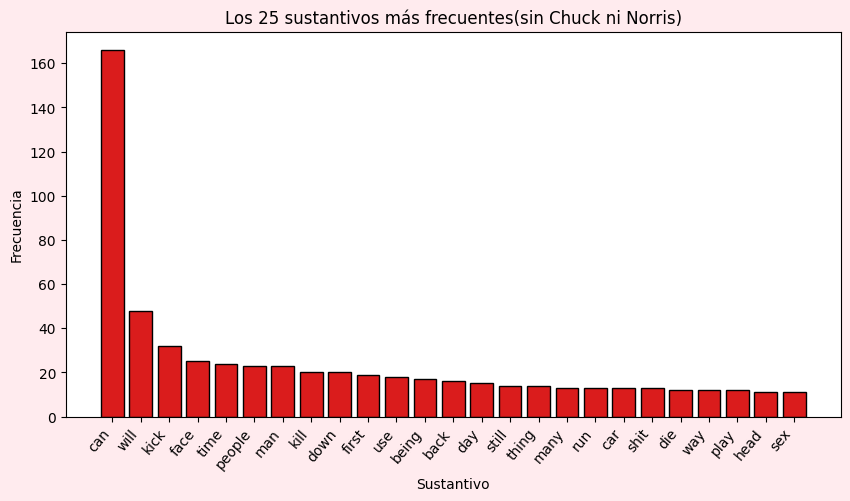

In [32]:
df = pd.DataFrame({'Palabra': palabras, 'Numero': numeros})

def filtrar_palabras(palabra):
    return palabra.lower() not in ['chuck', 'norris']

df_filtrado = df[df['Palabra'].apply(filtrar_palabras)]

palabras_frecuentes = df_filtrado.groupby('Palabra').sum().sort_values(by='Numero', ascending=False).head(25)

plt.figure(figsize=(10, 5), facecolor='#FFEBEE')

plt.bar(palabras_frecuentes.index, palabras_frecuentes['Numero'], color = '#DA1C1C', edgecolor='#000000')  # Utilizar bar para barras verticales
plt.xlabel('Sustantivo')
plt.ylabel('Frecuencia')
plt.title('Los 25 sustantivos más frecuentes(sin Chuck ni Norris)')
plt.xticks(rotation=50, ha='right')
plt.show()